<a href="https://colab.research.google.com/github/GangHyoun/Colab_Computer_Vision/blob/main/%EC%B0%A8%EB%9F%89%EB%B9%84%EC%A0%84_%EA%B3%BC%EC%A0%9C04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Brisk제외 참고 자료](https://colab.research.google.com/github/datascienceschool/book/blob/master/ds/03%20machine%20learning/03.02.05%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%8A%B9%EC%A7%95%20%EC%B6%94%EC%B6%9C.ipynb#scrollTo=j5_Om5nPBSAH)

In [ ]:
# @title 구글 드라이브 연동
# 현재 위치 확인
%pwd
#코랩과 드라이브 연동
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# @title 이미지 저장

#파일생성
!mkdir -p '/content/drive/MyDrive/image_openCV2'
#파일 저장 위치 변경
%cd /content/drive/MyDrive/image_openCV2/
#파일 저장하고, 저장 위치 확인
from google.colab import files

uploaded = files.upload()

/content/drive/MyDrive/image_openCV2


Saving ball0.png to ball0.png
Saving ball1.png to ball1.png
Saving ball2.png to ball2.png
Saving im0.png to im0.png
Saving im1.png to im1.png
Saving im2.png to im2.png


surf 사용을 위한 설치기

In [ ]:
!apt-get update
!apt-get install -y cmake g++ wget unzip
!apt-get install -y libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [874 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,084 kB]
Get:13 http://security.ubu

In [ ]:
!wget -q -O opencv.zip https://github.com/opencv/opencv/archive/4.x.zip
!wget -q -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/4.x.zip
!unzip -q opencv.zip
!unzip -q opencv_contrib.zip

In [ ]:
!mkdir -p opencv-4.x/build
%cd opencv-4.x/build

/content/opencv-4.x/build


In [ ]:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib-4.x/modules \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D BUILD_EXAMPLES=ON ..

-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- ocv_init_download: OpenCV source tree is not fetched as git repository. 3rdparty resources will be downloaded from github.com by default.
-- Detected processor: x86_64
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.10.12", minimum required is "3.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.10.so (found suitable exact version "3.10.12") 
-- Looking for ccache - not found
-- Performing Test HAVE_CXX_FSIGNED_CHAR
-- Performing Test HAVE_CXX_FSIGNED_CHAR

In [ ]:
!make -j8
!make install
!ldconfig

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/color_rgb.dispatch.cpp.o
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/color_yuv.dispatch.cpp.o
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/colormap.cpp.o
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/connectedcomponents.cpp.o
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/contours.cpp.o
[  9%] Linking CXX shared library ../../lib/libopencv_ml.so
[  9%] Built target opencv_ml
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/contours_approx.cpp.o
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/contours_common.cpp.o
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/contours_link.cpp.o
[  9%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/contours_ne

In [ ]:
#import
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#버스 이미지 호출
imgBusC = cv2.imread('/content/drive/MyDrive/image_openCV2/mot_color70.jpg')
imgBus = cv2.imread('/content/drive/MyDrive/image_openCV2/mot_color70.jpg',cv2.IMREAD_GRAYSCALE)
imgBus2 = cv2.imread('/content/drive/MyDrive/image_openCV2/mot_color83.jpg',cv2.IMREAD_GRAYSCALE)

#성 이미지 호출
imgCaC = cv2.imread('/content/drive/MyDrive/image_openCV2/1.jpg')
imgCa = cv2.imread('/content/drive/MyDrive/image_openCV2/1.jpg',cv2.IMREAD_GRAYSCALE)
imgCa2 = cv2.imread('/content/drive/MyDrive/image_openCV2/4.jpg',cv2.IMREAD_GRAYSCALE)
imgCa3 = cv2.imread('/content/drive/MyDrive/image_openCV2/7.jpg',cv2.IMREAD_GRAYSCALE)


imgImC = cv2.imread('/content/drive/MyDrive/image_openCV2/im0.png')
imgIm = cv2.imread('/content/drive/MyDrive/image_openCV2/im0.png', cv2.IMREAD_GRAYSCALE)
imgIm2 = cv2.imread('/content/drive/MyDrive/image_openCV2/im1.png', cv2.IMREAD_GRAYSCALE)
imgIm3 = cv2.imread('/content/drive/MyDrive/image_openCV2/im2.png', cv2.IMREAD_GRAYSCALE)

imgBallC = cv2.imread('/content/drive/MyDrive/image_openCV2/ball0.png')
imgBall = cv2.imread('/content/drive/MyDrive/image_openCV2/ball0.png', cv2.IMREAD_GRAYSCALE)
imgBall2 = cv2.imread('/content/drive/MyDrive/image_openCV2/ball1.png', cv2.IMREAD_GRAYSCALE)
imgBall3 = cv2.imread('/content/drive/MyDrive/image_openCV2/ball2.png', cv2.IMREAD_GRAYSCALE)

(-0.5, 1389.5, 1109.5, -0.5)

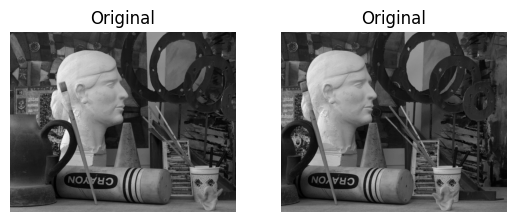

In [ ]:
# 이미지 불러오기
imgOriC = cv2.imread('/content/drive/MyDrive/image_openCV2/view0.png')
imgOri = cv2.imread('/content/drive/MyDrive/image_openCV2/view0.png', cv2.IMREAD_GRAYSCALE)
imgOri2 = cv2.imread('/content/drive/MyDrive/image_openCV2/view4.png', cv2.IMREAD_GRAYSCALE)
imgOri3 = cv2.imread('/content/drive/MyDrive/image_openCV2/view6.png', cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(imgOri, cmap ="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Original")
plt.imshow(imgOri2, cmap ="gray")
plt.axis("off")

**SIFT**

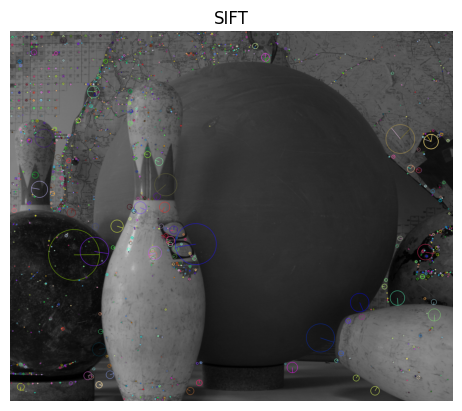

Number of keypoints: 1519


In [ ]:
img = imgBall
img2 = imgBall2
imgC = imgBallC

# SIFT 객체 생성
sift = cv2.SIFT_create()
kp = sift.detect(img,None)

imgSIFT=cv2.drawKeypoints(img,kp,imgC,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(imgSIFT, cmap="gray")
plt.title("SIFT")
plt.axis("off")
plt.show()

# 특징점 개수를 출력
print(f"Number of keypoints: {len(kp)}")

**SURF**

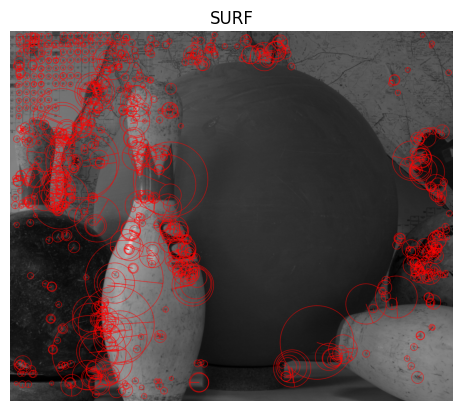

Number of keypoints: 919


In [ ]:
# SURF 특허로 인해 그냥은 사용할 수 없음

# SURF 생성 (Hessian Threshold는 임의로 400으로 설정)
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# 특징점 및 디스크립터 검출
keypoints, descriptors = surf.detectAndCompute(img, None)
#keypoints2, descriptors2 = surf.detectAndCompute(img2, None)

# 특징점을 그려줍니다
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255, 0, 0), 4)
#img2_with_keypoints = cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 0), 4)

# 결과 이미지 출력
#plt.figure(figsize=(15, 10))
plt.title('SURF')
plt.imshow(img_with_keypoints, cmap='gray')
plt.axis("off")
plt.show()

# 특징점 개수를 출력
print(f"Number of keypoints: {len(keypoints)}")

**ORB**

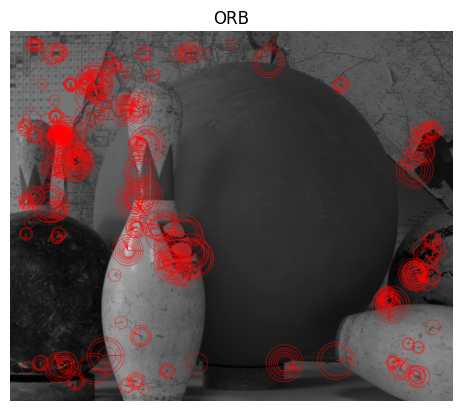

Number of keypoints: 500


In [ ]:
# ORB 생성 (임의로 500개의 특징점을 찾도록 설정)
orb = cv2.ORB_create(nfeatures=500)

# 특징점 및 디스크립터 검출
keypoints, descriptors = orb.detectAndCompute(img, None)
#keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# 특징점을 그려줍니다
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (255, 0, 0), 4)
#img2_with_keypoints = cv2.drawKeypoints(img2, keypoints2, None, (255, 0, 0), 4)

# 결과 이미지 출력
plt.axis("off")
plt.title('ORB')
plt.imshow(img_with_keypoints, cmap='gray')
plt.show()

# 특징점 개수를 출력
print(f"Number of keypoints: {len(keypoints)}")

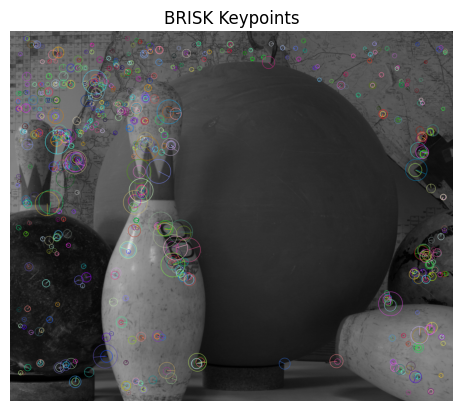

Number of BRISK keypoints: 708


In [ ]:
# BRISK 객체 생성
brisk = cv2.BRISK_create()

# 특징점 추출
keypoints, descriptors = brisk.detectAndCompute(img, None)
keypoints2, descriptors2 = brisk.detectAndCompute(img2, None)

# 이미지에 특징점 그리기
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 이미지 출력
plt.imshow(img_with_keypoints, cmap="gray")
plt.title("BRISK Keypoints")
plt.axis("off")
plt.show()

# 특징점의 개수
num_keypoints = len(keypoints)
print("Number of BRISK keypoints:", num_keypoints)

Correspondence Matching

---


FLANN
[FLANN 참고자료](https://bkshin.tistory.com/entry/OpenCV-28-%ED%8A%B9%EC%A7%95-%EB%A7%A4%EC%B9%ADFeature-Matching)

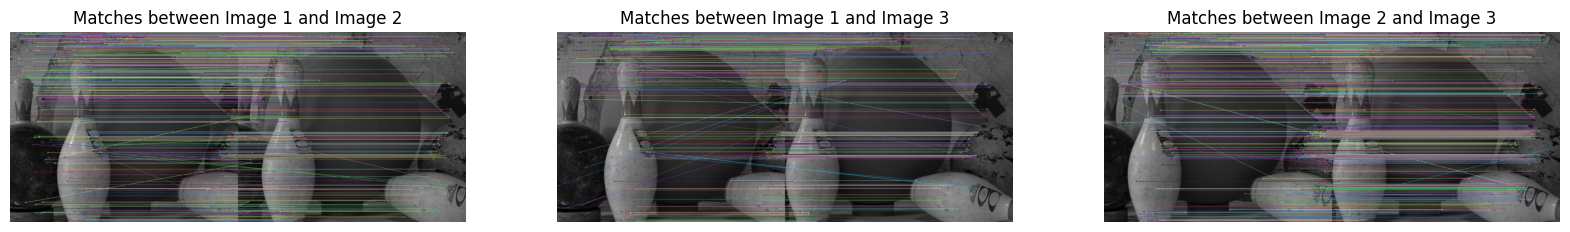

In [ ]:
imgSIF = imgBall
imgSIF2 = imgBall2
imgSIF3 = imgBall3

# SIFT 객체 생성
sift = cv2.SIFT_create()

# 이미지의 특징점과 디스크립터를 검출
keypoints1, descriptors1 = sift.detectAndCompute(imgSIF, None)
keypoints2, descriptors2 = sift.detectAndCompute(imgSIF2, None)
keypoints3, descriptors3 = sift.detectAndCompute(imgSIF3, None)

# FLANN 기반 매칭
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # 대조 점검 횟수

flann = cv2.FlannBasedMatcher(index_params, search_params)

# 첫 번째 쌍 이미지 매칭
matches1_2 = flann.knnMatch(descriptors1, descriptors2, k=2)
matches1_3 = flann.knnMatch(descriptors1, descriptors3, k=2)
matches2_3 = flann.knnMatch(descriptors2, descriptors3, k=2)

# 좋은 매칭점을 찾기 위한 조건 설정 (Lowe's ratio test)
def filter_matches(matches):
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    return good_matches

good_matches1_2 = filter_matches(matches1_2)
good_matches1_3 = filter_matches(matches1_3)
good_matches2_3 = filter_matches(matches2_3)

# 매칭 결과를 이미지에 그리기
img_matches1_2 = cv2.drawMatches(imgSIF, keypoints1, imgSIF2, keypoints2, good_matches1_2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches1_3 = cv2.drawMatches(imgSIF, keypoints1, imgSIF3, keypoints3, good_matches1_3, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches2_3 = cv2.drawMatches(imgSIF2, keypoints2, imgSIF3, keypoints3, good_matches2_3, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 결과 이미지 출력
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Matches between Image 1 and Image 2')
plt.imshow(img_matches1_2, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Matches between Image 1 and Image 3')
plt.imshow(img_matches1_3, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Matches between Image 2 and Image 3')
plt.imshow(img_matches2_3, cmap='gray')
plt.show()

**RANSAC**
[RANSAC 참고자료](https://bkshin.tistory.com/entry/OpenCV-29-%EC%98%AC%EB%B0%94%EB%A5%B8-%EB%A7%A4%EC%B9%AD%EC%A0%90-%EC%B0%BE%EA%B8%B0)

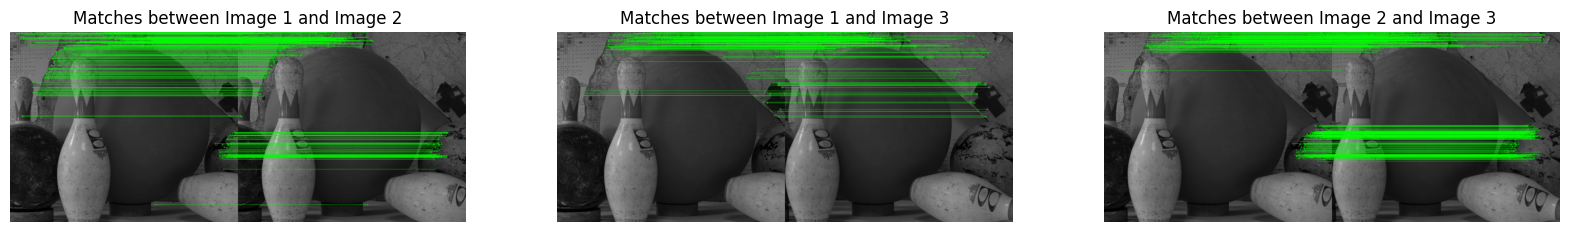

In [ ]:
imgSIF = imgBall
imgSIF2 = imgBall2
imgSIF3 = imgBall3

# SIFT 객체 생성
sift = cv2.SIFT_create()

# 이미지의 특징점과 디스크립터를 검출
keypoints1, descriptors1 = sift.detectAndCompute(imgSIF, None)
keypoints2, descriptors2 = sift.detectAndCompute(imgSIF2, None)
keypoints3, descriptors3 = sift.detectAndCompute(imgSIF3, None)

# FLANN 기반 매칭
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # 대조 점검 횟수

flann = cv2.FlannBasedMatcher(index_params, search_params)

# 첫 번째 쌍 이미지 매칭
matches1_2 = flann.knnMatch(descriptors1, descriptors2, k=2)
matches1_3 = flann.knnMatch(descriptors1, descriptors3, k=2)
matches2_3 = flann.knnMatch(descriptors2, descriptors3, k=2)

# 좋은 매칭점을 찾기 위한 조건 설정 (Lowe's ratio test)
def filter_matches(matches):
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    return good_matches

good_matches1_2 = filter_matches(matches1_2)
good_matches1_3 = filter_matches(matches1_3)
good_matches2_3 = filter_matches(matches2_3)

# RANSAC을 사용하여 매칭 개선
def apply_ransac(good_matches, keypoints1, keypoints2):
    if len(good_matches) >= 4:  # RANSAC을 적용하기 위해 최소 4개의 매칭점이 필요합니다
        src_pts = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 2)
        dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 2)

        # RANSAC을 사용한 기하학적 변환 행렬 찾기
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matches_mask = mask.ravel().tolist()

        return matches_mask
    else:
        return None

# RANSAC을 적용한 매칭 마스크 생성
matches_mask1_2 = apply_ransac(good_matches1_2, keypoints1, keypoints2)
matches_mask1_3 = apply_ransac(good_matches1_3, keypoints1, keypoints3)
matches_mask2_3 = apply_ransac(good_matches2_3, keypoints2, keypoints3)

# 매칭 결과를 이미지에 그리기 (RANSAC 적용 후)
def draw_matches(img1, kp1, img2, kp2, good_matches, matches_mask):
    draw_params = dict(matchColor=(0, 255, 0), singlePointColor=None, matchesMask=matches_mask, flags=2)
    return cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, **draw_params)

img_matches1_2 = draw_matches(imgSIF, keypoints1, imgSIF2, keypoints2, good_matches1_2, matches_mask1_2)
img_matches1_3 = draw_matches(imgSIF, keypoints1, imgSIF3, keypoints3, good_matches1_3, matches_mask1_3)
img_matches2_3 = draw_matches(imgSIF2, keypoints2, imgSIF3, keypoints3, good_matches2_3, matches_mask2_3)

# 결과 이미지 출력
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Matches between Image 1 and Image 2')
plt.imshow(img_matches1_2, cmap='gray')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Matches between Image 1 and Image 3')
plt.imshow(img_matches1_3, cmap='gray')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Matches between Image 2 and Image 3')
plt.imshow(img_matches2_3, cmap='gray')
plt.show()

Tamplate Matching

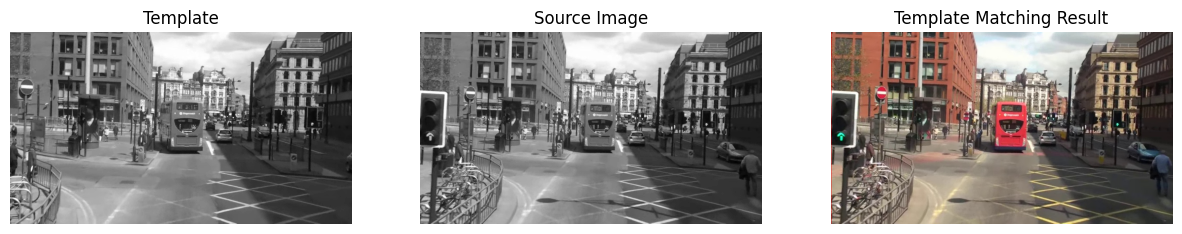

In [ ]:
# 이미지 불러오기
src = imgBus
templit = imgBus2
dst = imgBusC

# 템플릿 매칭 수행
result = cv2.matchTemplate(src, templit, cv2.TM_SQDIFF_NORMED)

# 매칭 결과에서 최소값과 위치 얻기
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
x, y = minLoc
h, w = templit.shape

# 매칭된 위치에 사각형 그리기
dst = cv2.rectangle(dst, (x, y), (x + w, y + h), (0, 0, 255), 1)

# 결과 시각화
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Template')
plt.imshow(templit, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Source Image')
plt.imshow(src, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Template Matching Result')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [ ]:
from imutils.object_detection import non_max_suppression

In [ ]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [ ]:
def template_matched_roi(img, template_img, threshold=0.9):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
    (t_height, t_width) = template_img.shape[:2]

    result = cv2.matchTemplate(gray, template_gray, cv2.TM_CCOEFF_NORMED)

    (yCoords, xCoords) = np.where(result >= threshold)

    roi_list = []

    for (x, y) in zip(xCoords, yCoords):
        roi_list.append((x, y, x + t_width, y + t_height))

    roi_array = non_max_suppression(np.array(roi_list))
    print("matched count : [{}]".format(len(roi_array)))

    return roi_array

In [ ]:
cv2_image = cv2.imread('asset/images/cats.jpg', cv2.IMREAD_COLOR)
img_show('original image', cv2_image)

In [ ]:
template_image = cv2.imread('asset/images/cat_template.jpg', cv2.IMREAD_COLOR)
img_show('template image', template_image)

In [ ]:
roi_array = template_matched_roi(cv2_image, template_image)
vis = cv2_image.copy()

for (x1, y1, x2, y2) in roi_array:
    cv2.rectangle(vis, (x1, y1), (x2, y2), (0, 255, 0), 3)

In [ ]:
img_show(['matched image'], [vis])